**SUPERSTORE DATASET ANALYSIS**

importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [4]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

In [5]:
#Check the first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
#column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Data cleaning

In [11]:
#checking the null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [30]:
df.shape

(9994, 21)

In [32]:
df.duplicated().sum()

np.int64(0)

In [15]:
#convert date
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
df["Ship Date"]=pd.to_datetime(df["Ship Date"],dayfirst=True)

In [17]:
#renaming columns
df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)

In [19]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**KPI's**

In [27]:
#Total profit
Total_profit=df["Profit"].sum()
print("Total Profit:",round(Total_profit,2))

Total Profit: 286397.02


In [26]:
#Total Sales
Total_sales=df["Sales"].sum()
print("Total Sales:",round(Total_sales,2))

Total Sales: 2297200.86


In [28]:
#Total Quantity
Total_quantity=df["Quantity"].sum()
print("Total quantity:",round(Total_quantity))

Total quantity: 37873


**Exploratory data analysis**

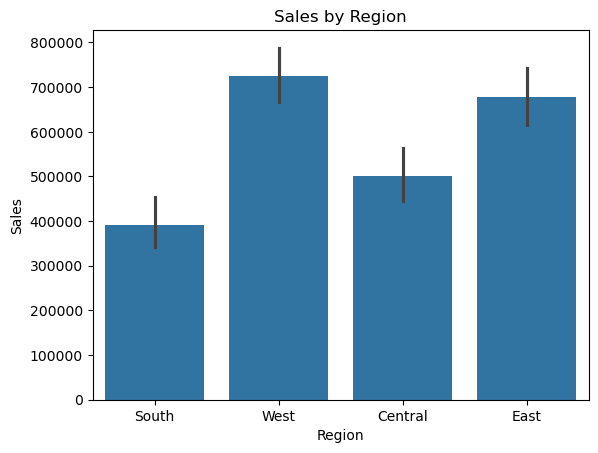

In [35]:
#Sales by region
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title("Sales by Region")
plt.show()


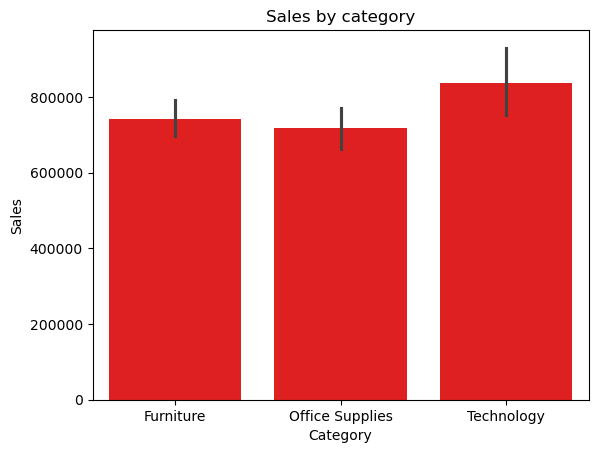

In [39]:
#Sales by category
sns.barplot(x="Category",y="Sales",data=df,estimator=sum,color="red")
plt.title("Sales by category")
plt.show()

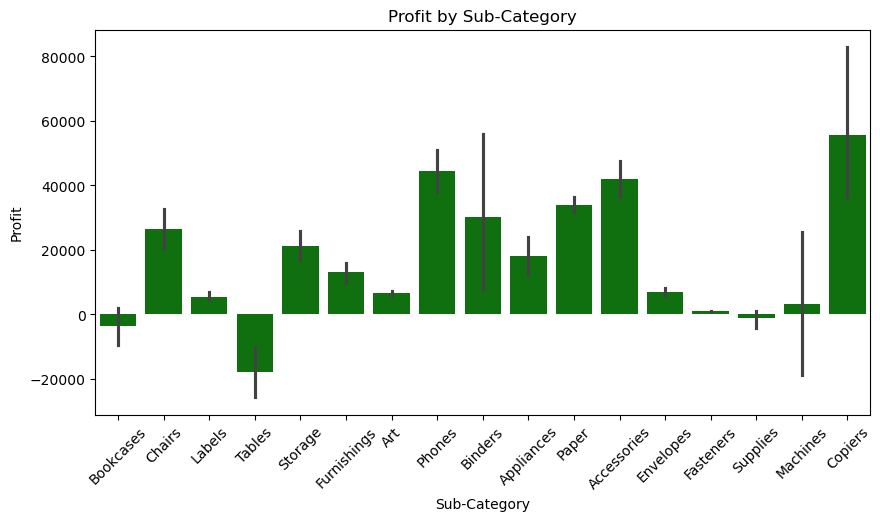

In [41]:
#Profit by sub-category
plt.figure(figsize=(10,5))
sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=sum,color="green")
plt.xticks(rotation=45)
plt.title("Profit by Sub-Category")
plt.show()


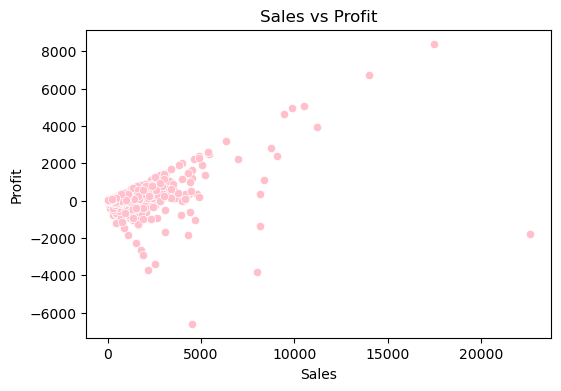

In [43]:
#Sales vs Profit
plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', data=df,color="pink")
plt.title("Sales vs Profit")
plt.show()


C:\Users\apoor\AppData\Local\Temp\ipykernel_6424\641078227.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order_Date')['Sales'].sum()


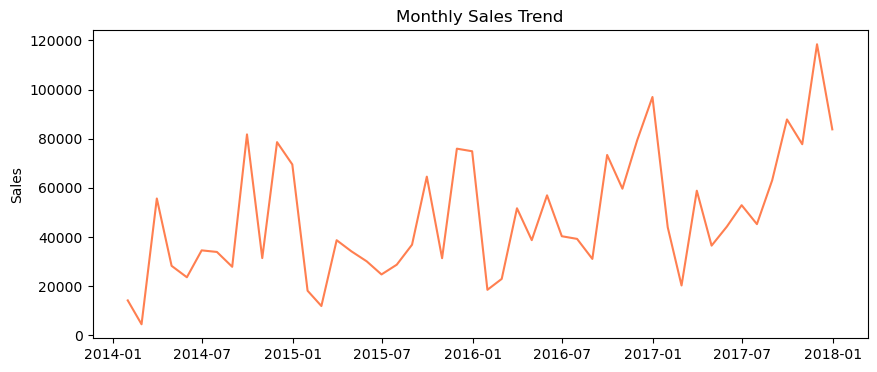

In [46]:
#Sales over time
monthly_sales = df.resample('M', on='Order_Date')['Sales'].sum()
plt.figure(figsize=(10,4))
plt.plot(monthly_sales.index, monthly_sales.values, color='coral')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()


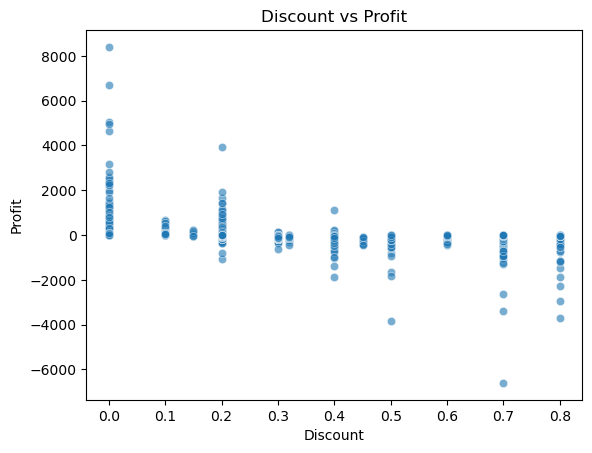

In [47]:
#discount vs profit
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
plt.title('Discount vs Profit')
plt.show()


C:\Users\apoor\AppData\Local\Temp\ipykernel_6424\2876243967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='magma')


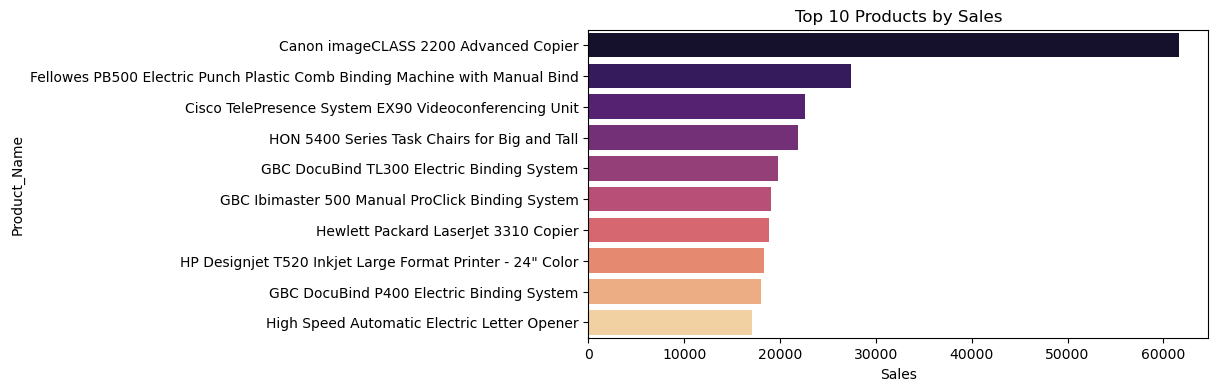

In [50]:
#Top 10 Products by Sales
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=top_products.index, x=top_products.values, palette='magma')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.show()